# Exploring specifically the Input Text Data for Training and Verification

In [1]:
import pandas as pd
import numpy as np
import os

# Loading Data

In [2]:
path_file = os.path.join(os.path.dirname(os.getcwd()), "data", "raw", "CRS2018data.txt")

In [5]:
df = pd.read_csv(path_file, sep='|', encoding='ISO-8859-1')

/Users/pedrobaiz/src/oecd_financial_flows/venv_oecdflows/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,5,51,53,56,57,77,79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.columns

Index(['Year', 'DonorCode', 'DonorName', 'AgencyCode', 'AgencyName', 'CrsID',
       'ProjectNumber', 'InitialReport', 'RecipientCode', 'RecipientName',
       'RegionCode', 'RegionName', 'IncomegroupCode', 'IncomegroupName',
       'FlowCode', 'FlowName', 'Bi_Multi', 'Category', 'Finance_t', 'Aid_t',
       'USD_Commitment', 'USD_Disbursement', 'USD_Received',
       'USD_Commitment_Defl', 'USD_Disbursement_Defl', 'USD_Received_Defl',
       'USD_Adjustment', 'USD_Adjustment_Defl', 'USD_AmountUntied',
       'USD_AmountPartialTied', 'USD_AmountTied', 'USD_AmountUntied_Defl',
       'USD_AmountPartialTied_Defl', 'USD_Amounttied_Defl', 'USD_IRTC',
       'USD_Expert_Commitment', 'USD_Expert_Extended', 'USD_Export_Credit',
       'CurrencyCode', 'Commitment_National', 'Disbursement_National',
       'GrantEquiv', 'USD_GrantEquiv', 'ShortDescription', 'ProjectTitle',
       'PurposeCode', 'PurposeName', 'SectorCode', 'SectorName', 'ChannelCode',
       'ChannelName', 'ChannelReportedName'

In [18]:
len(df.columns)

87

# Checking How Empty/Full Columns are

In [8]:
value_count_cols = df.count()

In [13]:
value_count_cols.sort_values(inplace=True)

In [11]:
type(value_count_cols)

pandas.core.series.Series

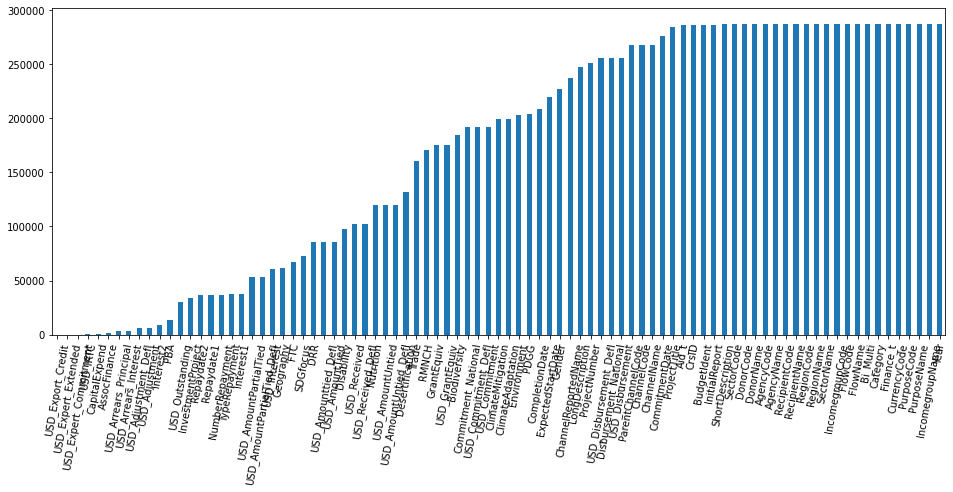

In [19]:
value_count_cols.plot.bar(rot=80, figsize=(16, 6))

In [21]:
df.groupby(['PurposeName', 'SDGfocus'])['ProjectNumber'].count()

PurposeName                                                              SDGfocus                   
Action relating to debt                                                  1                               2
                                                                         8.5;16                          1
Administrative costs (non-sector allocable)                              1                              48
                                                                         1.1                             3
                                                                         1.2                             2
                                                                                                        ..
Women's rights organisations and movements, and government institutions  9.2                             1
                                                                         9.3;4.4;4.3                     2
                                           

In [22]:
df['LongDescription']

0                                           Semi-aggregates
1                                           Semi-aggregates
2                                           Semi-aggregates
3                                           Semi-aggregates
4                                           Semi-aggregates
                                ...                        
287360    OCHA is responsible for bringing together huma...
287361    OCHA is responsible for bringing together huma...
287362    The textiles and construction sectors in Bangl...
287363    The textiles and construction sectors in Bangl...
287364                                                  NaN
Name: LongDescription, Length: 287365, dtype: object

In [26]:
value_count_cols['LongDescription'], value_count_cols['LongDescription']/len(df)*100, value_count_cols['ShortDescription'],  value_count_cols['ShortDescription']/len(df)*100

(247334, 86.06963269709254, 287364, 99.9996520105093)

In [27]:
df['ShortDescription']

0                                           Semi-aggregates
1                                           Semi-aggregates
2                                           Semi-aggregates
3                                           Semi-aggregates
4                                           Semi-aggregates
                                ...                        
287360        OCHA HUMANITARIAN AID PROGRAMME CONTRIBUTIONS
287361        OCHA HUMANITARIAN AID PROGRAMME CONTRIBUTIONS
287362    COURSES TO RAISE JOB PROSPECTS FOR THE POOR IN...
287363    COURSES TO RAISE JOB PROSPECTS FOR THE POOR IN...
287364                                                  NaN
Name: ShortDescription, Length: 287365, dtype: object

In [ ]:
df1 = df.replace(np.nan, '', regex=True)

# Distribution of Text Size (Number of Tokens) in the Descriptions 

In [28]:
df['LongDescriptionArray'] = df['LongDescription'].apply(lambda x: x.split())

AttributeError: 'float' object has no attribute 'split'